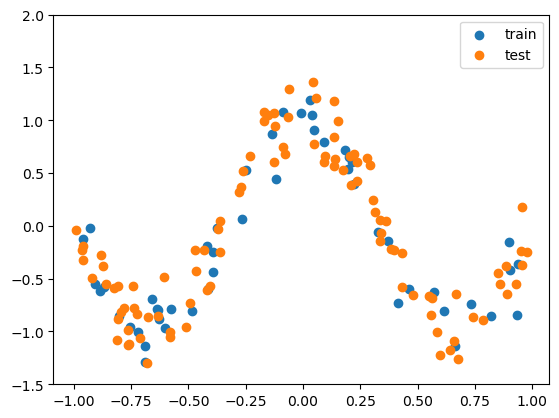

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 50
N_test = 2*N

np.random.seed(42)
x = 2.0*(np.random.rand(N)-0.5) # note that i'm using rand instead of randn
x = x[:,np.newaxis]
eps = (1/5)*np.random.randn(N)
y = np.cos((3/2)*np.pi*x[:,0]) + eps

np.random.seed(0)
x_test = 2.0*(np.random.rand(N_test)-0.5)
x_test = x_test[:,np.newaxis]
eps_test = (1/5)*np.random.randn(N_test)
y_test = np.cos((3/2)*np.pi*x_test[:,0]) + eps_test

plt.scatter(x[:,0],y, label='train')
plt.scatter(x_test[:,0],y_test, label = 'test')
plt.ylim([-1.5,2.0])
plt.legend()

# Compute a single forward pass

In [2]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return 1.0*(z > 0)


In [3]:
n1 = 10
theta = {
    "w1": np.random.randn(n1),
    "b1": np.random.randn(n1),
    "w2": np.random.randn(n1),
    "b2": np.random.randn(1)
}

w1, b1, w2, b2 = theta["w1"], theta["b1"], theta["w2"], theta["b2"]



h = np.dot(x, w1[np.newaxis,:]) + b1

z = np.dot(relu(h), w2) + b2

# dJidb2 = -2 (y[i]-z[i])
dJdb2 = -(2/N) *np.sum(y-z)

# h.shape = (N,n1)

# dJidw2 = -2 * (y[i]-z[i])* relu(h[i,:])
# (y-z).shape = (N,)
# relu(h).shape = (N, n1)
dJdw2 = -(2/N) *np.dot(y-z,relu(h))
# dJdw2.shape = (n1,)
# sanity, we can add dJdw2 to w2 and not get an error

# relu_derivative(h).shape = (N, n1)
# w2.shape = (n1,)
# (relu_derivative(h)*w2).shape = (N,n1)
# (y-z)[:,np.newaxis].shape = (N,1)
# (y-z)[:,np.newaxis]     *      (relu_derivative(h)*w2)    <=== (N,n1)
# (x.T).shape = (1, N)
dJdw1 = -(2/N)*np.dot(x.T,(y-z)[:,np.newaxis]*(relu_derivative(h)*w2)).flatten()

# same as above, but you just take the average
dJdb1 = -(2/N)*np.sum((y-z)[:,np.newaxis]*(relu_derivative(h)*w2),axis=0)


In [4]:

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return 1.0*(z > 0)

def forward_pass(x, theta):
    w1, b1, w2, b2 = theta["w1"], theta["b1"], theta["w2"], theta["b2"]
    h = np.dot(x, w1[np.newaxis,:]) + b1

    z = np.dot(relu(h), w2) + b2

    return h,z

def compute_loss(y, y_pred):
    return np.mean((y - y_pred)**2)

def compute_gradients(x, y, theta):
    w1, b1, w2, b2 = theta["w1"], theta["b1"], theta["w2"], theta["b2"]
    N = x.shape[0]

    h, z = forward_pass(x, theta)

    dJdw2 = -(2/N) *np.dot(y-z,relu(h))
    dJdb2 = -(2/N) *np.sum(y-z)

    dJdw1 = -(2/N)*np.dot(x.T,(y-z)[:,np.newaxis]*(relu_derivative(h)*w2)).flatten()
    dJdb1 = -(2/N)*np.sum((y-z)[:,np.newaxis]*(relu_derivative(h)*w2),axis=0)

    gradients = {
        "w1": dJdw1,
        "b1": dJdb1,
        "w2": dJdw2,
        "b2": dJdb2
    }

    return gradients

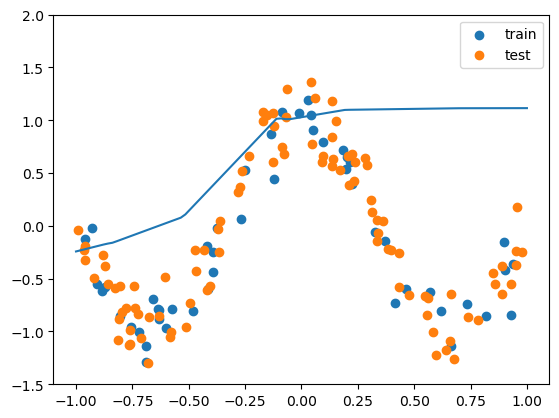

In [5]:

plt.scatter(x[:,0],y, label='train')
plt.scatter(x_test[:,0],y_test, label = 'test')
plt.ylim([-1.5,2.0])
plt.legend()

x_grid = np.linspace(-1,1,100)[:,np.newaxis]

_, y_grid = forward_pass(x_grid, theta)

plt.plot(x_grid[:,0],y_grid)

In [6]:

theta_list = [theta]
step_size = 0.01
for i in range(100000):
    theta = theta_list[-1]
    theta_grad = compute_gradients(x,y,theta)
    theta['w1'] -= step_size*theta_grad['w1']
    theta['b1'] -= step_size*theta_grad['b1']
    theta['w2'] -= step_size*theta_grad['w2']
    theta['b2'] -= step_size*theta_grad['b2']
    theta_list.append(theta)

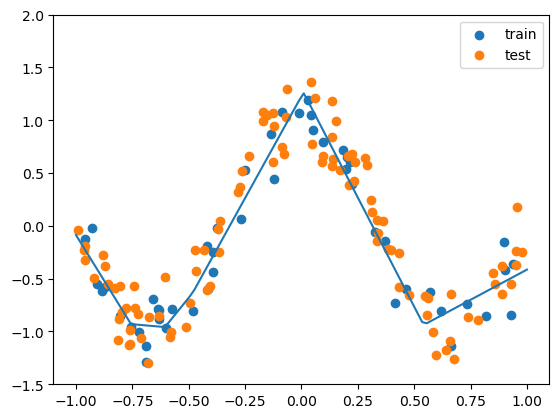

In [7]:
theta = theta_list[-1]
plt.scatter(x[:,0],y, label='train')
plt.scatter(x_test[:,0],y_test, label = 'test')
plt.ylim([-1.5,2.0])
plt.legend()

x_grid = np.linspace(-1,1,100)[:,np.newaxis]

_, y_grid = forward_pass(x_grid, theta)

plt.plot(x_grid[:,0],y_grid)